<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/10038/logos/header.png?t=2018-06-21-23-13-17">

In [1]:
# Load required packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

import json # to convert json in df
from pandas.io.json import json_normalize # to normalize the json file

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [2]:
def load_df(csv_path='../DATA/train_v2.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path,sep=',',
                     parse_dates=['date'], 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}_{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

print(os.listdir("../DATA"))

['.DS_Store', 'test_v2.csv', 'sample_submission_v2.csv', 'train_v2.csv', 'train_v2.csv.zip', 'test_v2.csv.zip', 'sample_submission_v2.csv.zip']


In [3]:
%%time
df_train = load_df("../DATA/train_v2.csv")
df_test = load_df("../DATA/test_v2.csv")

Loaded train_v2.csv. Shape: (1708337, 60)
Loaded test_v2.csv. Shape: (401589, 59)
CPU times: user 8min 25s, sys: 2min 41s, total: 11min 6s
Wall time: 13min 57s


In [4]:
df_train.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_sessionQualityDim,totals_timeOnSite,totals_transactions,totals_transactionRevenue,totals_totalTransactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_referralPath,trafficSource_isTrueDirect,trafficSource_adContent,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_campaignCode
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",2017-10-16,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508198450,1,1508198450,Firefox,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Western Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,1,NaN,NaN,NaN,NaN,(not set),google,organic,water bottle,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Referral,"[{'index': '4', 'value': 'North America'}]",2017-10-16,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,1508176307,6,1508176307,Chrome,not available in demo dataset,not available in demo dataset,Chrome OS,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Cupertino,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,2,2,NaN,NaN,2,28,NaN,NaN,NaN,(not set),sites.google.com,referral,NaN,not available in demo dataset,/a/google.com/transportation/mtv-services/bike...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Direct,"[{'index': '4', 'value': 'North America'}]",2017-10-16,7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508201613,1,1508201613,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset

In [5]:
df_train.dtypes

channelGrouping                                              object
customDimensions                                             object
date                                                 datetime64[ns]
fullVisitorId                                                object
hits                                                         object
socialEngagementType                                         object
visitId                                                       int64
visitNumber                                                   int64
visitStartTime                                                int64
device_browser                                               object
device_browserVersion                                        object
device_browserSize                                           object
device_operatingSystem                                       object
device_operatingSystemVersion                                object
device_isMobile                                 

In [6]:
df_train.dtypes.value_counts()

object            55
int64              3
datetime64[ns]     1
bool               1
dtype: int64

In [7]:
def replace_constant_val(df):
    cols_replace = {
        'socialEngagementType' : 'Not Socially Engaged',
        'device_browserSize' : 'not available in demo dataset', 
        'device_flashVersion' : 'not available in demo dataset', 
        'device_browserVersion' : 'not available in demo dataset', 
        'device_language' : 'not available in demo dataset',
        'device_mobileDeviceBranding' : 'not available in demo dataset',
        'device_mobileDeviceInfo' : 'not available in demo dataset',
        'device_mobileDeviceMarketingName' : 'not available in demo dataset',
        'device_mobileDeviceModel' : 'not available in demo dataset',
        'device_mobileInputSelector' : 'not available in demo dataset',
        'device_operatingSystemVersion' : 'not available in demo dataset',
        'device_screenColors' : 'not available in demo dataset',
        'device_screenResolution' : 'not available in demo dataset',
        'geoNetwork_city' : 'not available in demo dataset',
        'geoNetwork_cityId' : 'not available in demo dataset',
        'geoNetwork_latitude' : 'not available in demo dataset',
        'geoNetwork_longitude' : 'not available in demo dataset',
        'geoNetwork_metro' : ['not available in demo dataset', '(not set)'], 
        'geoNetwork_networkDomain' : 'unknown.unknown', 
        'geoNetwork_networkLocation' : 'not available in demo dataset',
        'geoNetwork_region' : 'not available in demo dataset',
        'trafficSource_adwordsClickInfo.criteriaParameters' : 'not available in demo dataset',
        'trafficSource_campaign' : '(not set)', 
        'trafficSource_keyword' : '(not provided)',
        'networkDomain': '(not set)', 
        'city': '(not set)', 
    }
    df = df.replace(cols_replace,'NA')
    return df

In [8]:
df_train = replace_constant_val(df_train)
df_test = replace_constant_val(df_test)

In [9]:
df_train.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_sessionQualityDim,totals_timeOnSite,totals_transactions,totals_transactionRevenue,totals_totalTransactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_referralPath,trafficSource_isTrueDirect,trafficSource_adContent,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_campaignCode
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",2017-10-16,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",NA,1508198450,1,1508198450,Firefox,NA,NA,Windows,NA,False,NA,NA,NA,NA,NA,NA,NA,NA,NA,desktop,Europe,Western Europe,Germany,NA,NA,NA,NA,(not set),NA,NA,NA,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NA,google,organic,water bottle,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Referral,"[{'index': '4', 'value': 'North America'}]",2017-10-16,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",NA,1508176307,6,1508176307,Chrome,NA,NA,Chrome OS,NA,False,NA,NA,NA,NA,NA,NA,NA,NA,NA,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Cupertino,NA,(not set),NA,NA,NA,1,2,2,NaN,NaN,2,28,NaN,NaN,NaN,NA,sites.google.com,referral,NaN,NA,/a/google.com/transportation/mtv-services/bike...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Direct,"[{'index': '4', 'value': 'North America'}]",2017-10-16,7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",NA,1508201613,1,1508201613,Chrome,NA,NA,Android,NA,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,mobile,Americas,Northern America,United States,NA,NA,NA,NA,windjammercable.net,NA,NA,NA,1,2,2,NaN,1,1,38,NaN,NaN,NaN,NA,(direct),(none),NaN,NA,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",2017-10-16,9075655783635761930,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",NA,1508169851,1,1508169851,Chrome,NA,NA,Windows,NA,False,NA,NA,NA,NA,NA,NA,NA,NA,NA,desktop,Asia,Western Asia,Turkey,NA,NA,NA,NA,NA,NA,NA,NA,1,2,2,NaN,1,1,1,NaN,NaN,NaN,NA,google,organic,NA,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",2017-10-16,6960673291025684308,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",NA,1508190552,1,1508190552,Chrome,NA,NA,Windows,NA,False,NA,NA,NA,NA,NA,NA,NA,NA,NA,desktop,Americas,Central America,Mexico,NA,NA,NA,NA,prod-infinitum.com.mx,NA,NA,NA,1,2,2,NaN,1,1,52,NaN,NaN,NaN,NA,google,organic,NA,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_train.isnull().sum()

channelGrouping                                            0
customDimensions                                           0
date                                                       0
fullVisitorId                                              0
hits                                                       0
socialEngagementType                                       0
visitId                                                    0
visitNumber                                                0
visitStartTime                                             0
device_browser                                             0
device_browserVersion                                      0
device_browserSize                                         0
device_operatingSystem                                     0
device_operatingSystemVersion                              0
device_isMobile                                            0
device_mobileDeviceBranding                                0
device_mobileDeviceModel

In [11]:
def to_na(df):
    # Each type of columns that need to replace with the right na values
    to_NA_cols = ['trafficSource_adContent','trafficSource_adwordsClickInfo.adNetworkType',
                'trafficSource_adwordsClickInfo.slot','trafficSource_adwordsClickInfo.gclId',
                'trafficSource_keyword','trafficSource_referralPath']

    to_0_cols = ['totals_transactionRevenue','trafficSource_adwordsClickInfo.page','totals_sessionQualityDim','totals_bounces',
                 'totals_timeOnSite','totals_newVisits','totals_pageviews','totals_transactions','totals_totalTransactionRevenue']

    to_true_cols = ['trafficSource_adwordsClickInfo.isVideoAd']
    to_false_cols = ['trafficSource_isTrueDirect']
    
    
    df[to_NA_cols] = df[to_NA_cols].fillna('NA')
    df[to_0_cols] = df[to_0_cols].fillna(0)
    df[to_true_cols] = df[to_true_cols].fillna(True)
    df[to_false_cols] = df[to_false_cols].fillna(False)
    
    return df

In [12]:
df_train = to_na(df_train)
df_test = to_na(df_test)

In [13]:
def fix_it(df):
    # Fill na and rename the Revenue column
    df['totals_transactionRevenue'] = df['totals_transactionRevenue'].fillna(0).astype(float)

    to_int = ['totals_bounces','totals_newVisits','totals_pageviews',
              'totals_hits','totals_sessionQualityDim',
            'totals_visits','totals_timeOnSite','trafficSource_adwordsClickInfo.page',
            'totals_transactions','totals_totalTransactionRevenue']
    for col in to_int :
        df[col] = df[col].astype(int)

    return df

In [14]:
df_train = fix_it(df_train)
df_test = fix_it(df_test)

In [15]:
df_train.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_sessionQualityDim,totals_timeOnSite,totals_transactions,totals_transactionRevenue,totals_totalTransactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_referralPath,trafficSource_isTrueDirect,trafficSource_adContent,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_campaignCode
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",2017-10-16,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",NA,1508198450,1,1508198450,Firefox,NA,NA,Windows,NA,False,NA,NA,NA,NA,NA,NA,NA,NA,NA,desktop,Europe,Western Europe,Germany,NA,NA,NA,NA,(not set),NA,NA,NA,1,1,1,1,1,1,0,0,0.0,0,NA,google,organic,water bottle,NA,NA,False,NA,0,NA,NA,NA,True,NaN
1,Referral,"[{'index': '4', 'value': 'North America'}]",2017-10-16,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",NA,1508176307,6,1508176307,Chrome,NA,NA,Chrome OS,NA,False,NA,NA,NA,NA,NA,NA,NA,NA,NA,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Cupertino,NA,(not set),NA,NA,NA,1,2,2,0,0,2,28,0,0.0,0,NA,sites.google.com,referral,NA,NA,/a/google.com/transportation/mtv-services/bike...,False,NA,0,NA,NA,NA,True,NaN
2,Direct,"[{'index': '4', 'value': 'North America'}]",2017-10-16,7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",NA,1508201613,1,1508201613,Chrome,NA,NA,Android,NA,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,mobile,Americas,Northern America,United States,NA,NA,NA,NA,windjammercable.net,NA,NA,NA,1,2,2,0,1,1,38,0,0.0,0,NA,(direct),(none),NA,NA,NA,True,NA,0,NA,NA,NA,True,NaN
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",2017-10-16,9075655783635761930,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",NA,1508169851,1,1508169851,Chrome,NA,NA,Windows,NA,False,NA,NA,NA,NA,NA,NA,NA,NA,NA,desktop,Asia,Western Asia,Turkey,NA,NA,NA,NA,NA,NA,NA,NA,1,2,2,0,1,1,1,0,0.0,0,NA,google,organic,NA,NA,NA,False,NA,0,NA,NA,NA,True,NaN
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",2017-10-16,6960673291025684308,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",NA,1508190552,1,1508190552,Chrome,NA,NA,Windows,NA,False,NA,NA,NA,NA,NA,NA,NA,NA,NA,desktop,Americas,Central America,Mexico,NA,NA,NA,NA,prod-infinitum.com.mx,NA,NA,NA,1,2,2,0,1,1,52,0,0.0,0,NA,google,organic,NA,NA,NA,False,NA,0,NA,NA,NA,True,NaN


In [16]:
CONST_COLLUMNS = ['socialEngagementType','device_browserVersion',
                  'device_browserSize','device_flashVersion',
                  'device_language','device_mobileDeviceBranding',
                  'device_mobileDeviceInfo','device_mobileDeviceMarketingName',
                  'device_mobileDeviceModel','device_mobileInputSelector',
                  'device_operatingSystemVersion','device_screenColors',
                  'device_screenResolution','geoNetwork_cityId',
                  'geoNetwork_latitude','geoNetwork_longitude',
                  'geoNetwork_networkLocation',
                  'trafficSource_adwordsClickInfo.criteriaParameters']

In [17]:
# Drop constant columns
df_train.drop(CONST_COLLUMNS,axis=1,inplace=True)
df_test.drop(CONST_COLLUMNS,axis=1,inplace=True)

In [18]:
df_train.shape

(1708337, 42)

In [19]:
df_train.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,visitId,visitNumber,visitStartTime,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_networkDomain,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_sessionQualityDim,totals_timeOnSite,totals_transactions,totals_transactionRevenue,totals_totalTransactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_referralPath,trafficSource_isTrueDirect,trafficSource_adContent,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_campaignCode
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",2017-10-16,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",1508198450,1,1508198450,Firefox,Windows,False,desktop,Europe,Western Europe,Germany,NA,NA,NA,(not set),1,1,1,1,1,1,0,0,0.0,0,NA,google,organic,water bottle,NA,False,NA,0,NA,NA,NA,True,NaN
1,Referral,"[{'index': '4', 'value': 'North America'}]",2017-10-16,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",1508176307,6,1508176307,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Cupertino,(not set),1,2,2,0,0,2,28,0,0.0,0,NA,sites.google.com,referral,NA,/a/google.com/transportation/mtv-services/bike...,False,NA,0,NA,NA,NA,True,NaN
2,Direct,"[{'index': '4', 'value': 'North America'}]",2017-10-16,7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",1508201613,1,1508201613,Chrome,Android,True,mobile,Americas,Northern America,United States,NA,NA,NA,windjammercable.net,1,2,2,0,1,1,38,0,0.0,0,NA,(direct),(none),NA,NA,True,NA,0,NA,NA,NA,True,NaN
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",2017-10-16,9075655783635761930,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",1508169851,1,1508169851,Chrome,Windows,False,desktop,Asia,Western Asia,Turkey,NA,NA,NA,NA,1,2,2,0,1,1,1,0,0.0,0,NA,google,organic,NA,NA,False,NA,0,NA,NA,NA,True,NaN
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",2017-10-16,6960673291025684308,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",1508190552,1,1508190552,Chrome,Windows,False,desktop,Americas,Central America,Mexico,NA,NA,NA,prod-infinitum.com.mx,1,2,2,0,1,1,52,0,0.0,0,NA,google,organic,NA,NA,False,NA,0,NA,NA,NA,True,NaN


In [20]:
# Drop hits column 
df_train.drop('hits',axis=1,inplace=True)
df_test.drop('hits',axis=1,inplace=True)

In [21]:
df_train.head()

,channelGrouping,customDimensions,date,fullVisitorId,visitId,visitNumber,visitStartTime,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_networkDomain,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_sessionQualityDim,totals_timeOnSite,totals_transactions,totals_transactionRevenue,totals_totalTransactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_referralPath,trafficSource_isTrueDirect,trafficSource_adContent,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_campaignCode
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",2017-10-16,3162355547410993243,1508198450,1,1508198450,Firefox,Windows,False,desktop,Europe,Western Europe,Germany,NA,NA,NA,(not set),1,1,1,1,1,1,0,0,0.0,0,NA,google,organic,water bottle,NA,False,NA,0,NA,NA,NA,True,NaN
1,Referral,"[{'index': '4', 'value': 'North America'}]",2017-10-16,8934116514970143966,1508176307,6,1508176307,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Cupertino,(not set),1,2,2,0,0,2,28,0,0.0,0,NA,sites.google.com,referral,NA,/a/google.com/transportation/mtv-services/bike...,False,NA,0,NA,NA,NA,True,NaN
2,Direct,"[{'index': '4', 'value': 'North America'}]",2017-10-16,7992466427990357681,1508201613,1,1508201613,Chrome,Android,True,mobile,Americas,Northern America,United States,NA,NA,NA,windjammercable.net,1,2,2,0,1,1,38,0,0.0,0,NA,(direct),(none),NA,NA,True,NA,0,NA,NA,NA,True,NaN
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",2017-10-16,9075655783635761930,1508169851,1,1508169851,Chrome,Windows,False,desktop,Asia,Western Asia,Turkey,NA,NA,NA,NA,1,2,2,0,1,1,1,0,0.0,0,NA,google,organic,NA,NA,False,NA,0,NA,NA,NA,True,NaN
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",2017-10-16,6960673291025684308,1508190552,1,1508190552,Chrome,Windows,False,desktop,Americas,Central America,Mexico,NA,NA,NA,prod-infinitum.com.mx,1,2,2,0,1,1,52,0,0.0,0,NA,google,organic,NA,NA,False,NA,0,NA,NA,NA,True,NaN


In [22]:
visit_diff = set(df_train['visitId']).intersection(set(df_train['visitStartTime']))

In [23]:
len(visit_diff)

1659430

In [25]:
# Drop columns which are mostly NaN
col_drop = ['geoNetwork_region', 'geoNetwork_metro', 'geoNetwork_city', 'geoNetwork_networkDomain',
            'trafficSource_campaign', 'trafficSource_medium', 'trafficSource_keyword', 'trafficSource_referralPath',
           'trafficSource_adContent', 'trafficSource_adwordsClickInfo.slot', 'trafficSource_adwordsClickInfo.gclId',
           'trafficSource_adwordsClickInfo.adNetworkType','trafficSource_campaignCode']
df_train.drop(col_drop, axis=1, inplace=True)
df_test.drop(col_drop, axis=1, inplace=True)

KeyError: "['geoNetwork_region' 'geoNetwork_metro' 'geoNetwork_city'\n 'geoNetwork_networkDomain' 'trafficSource_campaign'\n 'trafficSource_medium' 'trafficSource_keyword'\n 'trafficSource_referralPath' 'trafficSource_adContent'\n 'trafficSource_adwordsClickInfo.slot'\n 'trafficSource_adwordsClickInfo.gclId'\n 'trafficSource_adwordsClickInfo.adNetworkType'\n 'trafficSource_campaignCode'] not found in axis"

In [26]:
df_train.head()

,channelGrouping,customDimensions,date,fullVisitorId,visitId,visitNumber,visitStartTime,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_sessionQualityDim,totals_timeOnSite,totals_transactions,totals_transactionRevenue,totals_totalTransactionRevenue,trafficSource_source,trafficSource_isTrueDirect,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.isVideoAd
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",2017-10-16,3162355547410993243,1508198450,1,1508198450,Firefox,Windows,False,desktop,Europe,Western Europe,Germany,1,1,1,1,1,1,0,0,0.0,0,google,False,0,True
1,Referral,"[{'index': '4', 'value': 'North America'}]",2017-10-16,8934116514970143966,1508176307,6,1508176307,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,1,2,2,0,0,2,28,0,0.0,0,sites.google.com,False,0,True
2,Direct,"[{'index': '4', 'value': 'North America'}]",2017-10-16,7992466427990357681,1508201613,1,1508201613,Chrome,Android,True,mobile,Americas,Northern America,United States,1,2,2,0,1,1,38,0,0.0,0,(direct),True,0,True
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",2017-10-16,9075655783635761930,1508169851,1,1508169851,Chrome,Windows,False,desktop,Asia,Western Asia,Turkey,1,2,2,0,1,1,1,0,0.0,0,google,False,0,True
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",2017-10-16,6960673291025684308,1508190552,1,1508190552,Chrome,Windows,False,desktop,Americas,Central America,Mexico,1,2,2,0,1,1,52,0,0.0,0,google,False,0,True


In [27]:
df_train.shape

(1708337, 28)

In [ ]:
Target Variable Exploration:

Since we are predicting the natural log of sum of all transactions of the user, 
let us sum up the transaction revenue at user level and take a log and then do a scatter plot.

In [32]:
# Printing some statistics of our data
print("Transaction Revenue Min Value: ", 
      df_train[df_train['totals_transactionRevenue'] > 0]["totals_transactionRevenue"].min()) # printing the min value
print("Transaction Revenue Mean Value: ", 
      df_train[df_train['totals_transactionRevenue'] > 0]["totals_transactionRevenue"].mean()) # mean value
print("Transaction Revenue Median Value: ", 
      df_train[df_train['totals_transactionRevenue'] > 0]["totals_transactionRevenue"].median()) # median value
print("Transaction Revenue Max Value: ", 
      df_train[df_train['totals_transactionRevenue'] > 0]["totals_transactionRevenue"].max()) # the max value

Transaction Revenue Min Value:  10000.0
Transaction Revenue Mean Value:  125113156.53019337
Transaction Revenue Median Value:  46060000.0
Transaction Revenue Max Value:  23129500000.0


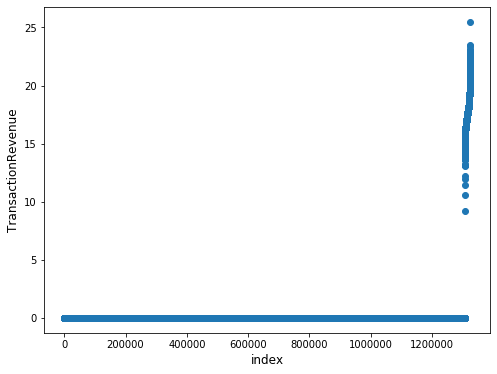

In [36]:
tgt = df_train.groupby("fullVisitorId")["totals_transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(tgt.shape[0]), np.sort(np.log1p(tgt["totals_transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

In [ ]:
The 80/20 rule has proven true for many businesses–only a small percentage of customers produce most of the revenue.
As such, marketing teams are challenged to make appropriate investments in promotional strategies.

In [40]:
non_zero_rev = (tgt["totals_transactionRevenue"]>0).sum()
print("Number of unique customers with non-zero revenue : ", non_zero_rev, "and the ratio is : ", non_zero_rev / tgt.shape[0])

Number of unique customers with non-zero revenue :  16141 and the ratio is :  0.012193574218307359


In [ ]:
Device Browsers

Percentual of Browser usage: 
Chrome               1173056
Safari                312165
Firefox                63845
Internet Explorer      35474
Android Webview        34266
Edge                   20543
Samsung Internet       15792
Opera Mini             15018
Name: device_browser, dtype: int64


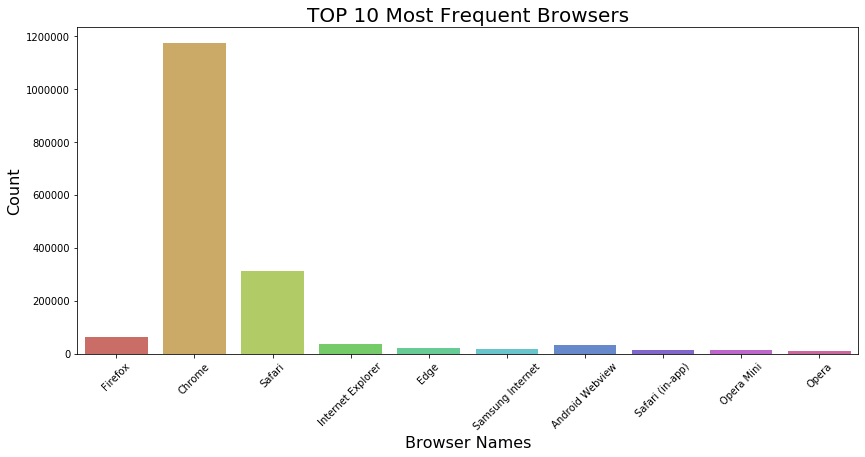

In [38]:
# the top 10 of browsers represent % of total
print("Percentual of Browser usage: ")
print(df_train['device_browser'].value_counts()[:8] ) # printing the top 8 percentage of browsers

# seting the graph size
plt.figure(figsize=(14,6))

# Let explore the browser used by users
sns.countplot(df_train[df_train['device_browser']\
                       .isin(df_train['device_browser']\
                             .value_counts()[:10].index.values)]['device_browser'], palette="hls") # It's a module to count the category's
plt.title("TOP 10 Most Frequent Browsers", fontsize=20) # Adding Title and seting the size
plt.xlabel("Browser Names", fontsize=16) # Adding x label and seting the size
plt.ylabel("Count", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #use plt.show to render the graph that we did above

In [ ]:
Channel Grouping

Percentual of Channel Grouping used: 
Organic Search    738963
Social            354971
Direct            273134
Referral          211307
Display            51283
Name: channelGrouping, dtype: int64


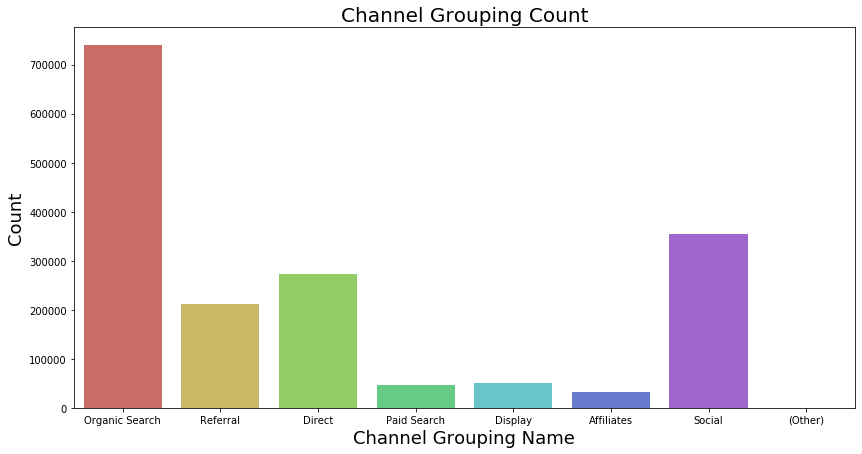

In [43]:
# the top 10 of browsers represent % of total
print("Percentual of Channel Grouping used: ")
print((df_train['channelGrouping'].value_counts()[:5])) # printing the top 7 percentage of browsers

# seting the graph size
plt.figure(figsize=(14,7))

# let explore the browser used by users
sns.countplot(df_train["channelGrouping"], palette="hls") # It's a module to count the category's
plt.title("Channel Grouping Count", fontsize=20) # seting the title size
plt.xlabel("Channel Grouping Name", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size

plt.show() #use plt.show to render the graph that we did above

In [ ]:
Channel vs Browser

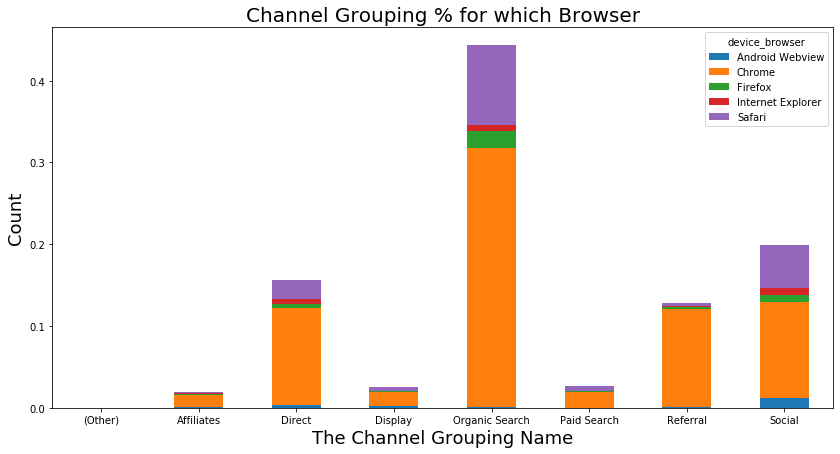

In [44]:
## I will use the crosstab to explore two categorical values

# At index I will use set my variable that I want analyse and cross by another
crosstab_eda = pd.crosstab(index=df_train['channelGrouping'], normalize=True,
                           # at this line, I am using the isin to select just the top 5 of browsers
                           columns=df_train[df_train['device_browser'].isin(df_train['device_browser']\
                                                                            .value_counts()[:5].index.values)]['device_browser'])
# Ploting the crosstab that we did above
crosstab_eda.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(14,7), # adjusting the size of graphs
                 stacked=True)   # code to unstack 
plt.title("Channel Grouping % for which Browser", fontsize=20) # seting the title size
plt.xlabel("The Channel Grouping Name", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size
plt.xticks(rotation=0)
plt.show() # rendering

In [ ]:
Operational System

Percent of Operational System: 
Windows      619720
Macintosh    438514
Android      299386
iOS          219334
Linux         63971
Name: device_operatingSystem, dtype: int64


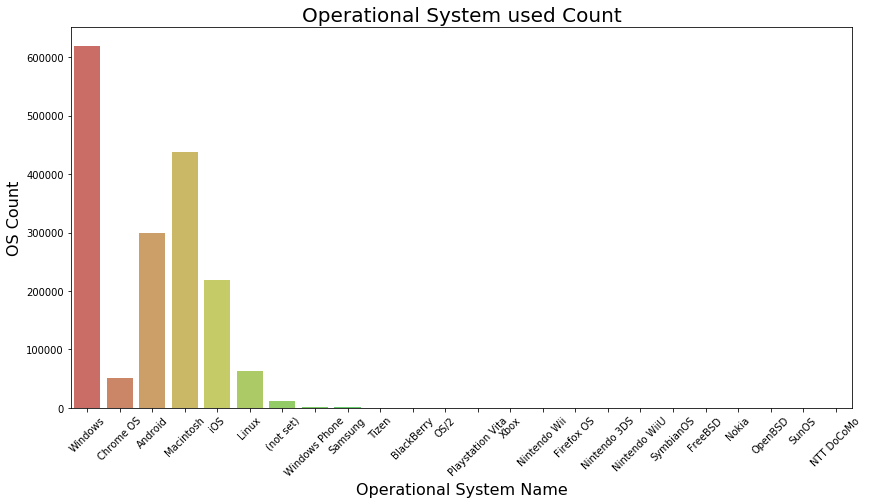

In [45]:
# the top 5 of browsers represent % of total
print("Percent of Operational System: ")
print(df_train['device_operatingSystem'].value_counts()[:5]) # printing the top 7 percentage of browsers

# seting the graph size
plt.figure(figsize=(14,7))

# let explore the browser used by users
sns.countplot(df_train["device_operatingSystem"], palette="hls") # It's a module to count the category's
plt.title("Operational System used Count", fontsize=20) # seting the title size
plt.xlabel("Operational System Name", fontsize=16) # seting the x label size
plt.ylabel("OS Count", fontsize=16) # seting the y label size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #use plt.show to render the graph that we did above